# Pymaceuticals Inc.
---

### Analysis

- The treatments regimens of Capomulin and Ramicane had a better reduction in tumor volume.

- The correlation between mouse weight and average tumor volume: 0.84 is a strong positive correlation. As the mouse weight increases so does the average tumor volume.

- The results of the study seem consistent, as there is only 1 outlier in the provided data set, none of which for Capomulin. The R-Value is 70%, this fits within the mean of the data, which makes Capomulin a reliable regimen.
 

In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = mouse_metadata.merge(study_results, how='left', on='Mouse ID')

# Display the data table for preview
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = len(mouse_results["Mouse ID"].unique())
print(f"The number of mice in the study: There are {mice} mice.")

The number of mice in the study: There are 249 mice.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice = mouse_results.loc[mouse_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(f"The duplicate mouse had MOUSE ID: {dupe_mice}.")

The duplicate mouse had MOUSE ID: ['g989'].


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_micedf = mouse_results.loc[mouse_results["Mouse ID"] == "g989", :]
dupe_micedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_results.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice = len(clean_df["Mouse ID"].unique())
print(f"The number of mice in the study: There are still {new_mice} mice.")

The number of mice in the study: There are still 249 mice.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_val = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median_val = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var_val = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
stdev_val = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem_val = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistic_df = pd.DataFrame(

                    {"Mean Tumor Volume":mean_val,
                     "Median Tumor Volume":median_val,
                     "Variance of Tumor Volume":var_val,
                     "Std Dev of Tumor Volume":stdev_val,
                     "Std Error of Tumor Volume":sem_val})

summary_statistic_df

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Std Dev of Tumor Volume,Std Error of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

stats = clean_df.groupby('Drug Regimen')
aggregation_stats = stats.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
aggregation_stats


#Ignore the warning. It did infact populate.

/var/folders/w2/pxq26xfd0_s7pq6lzhh8v2_c0000gn/T/ipykernel_5965/326407372.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  aggregation_stats = stats.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
#To make X & Y axis, I had to find out the number of mice per regimen

number_of_mice = clean_df["Drug Regimen"].value_counts()
number_of_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

In [11]:
mice_timepoints = clean_df["Timepoint"].value_counts()
mice_timepoints

0     249
5     237
10    222
15    206
20    194
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

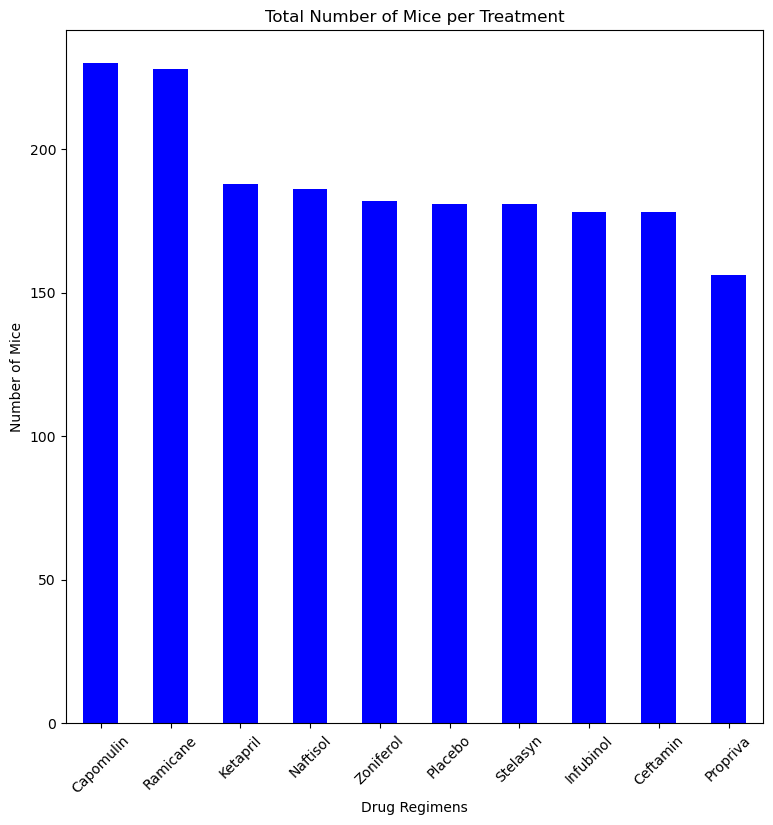

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# pandas_bar = mice_timepoints.plot.bar(figsize=(9,9), color='red', rot=90)
pandas_bar1 = number_of_mice.plot.bar(figsize=(9,9), color='blue', rot=45)
plt.title("Total Number of Mice per Treatment")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice")

plt.show()

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#X should be the drug regimen, Y should be number of mice tested.
mice_too = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()
# x_axis = np.arange(len(number_of_mice))
# y_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
# plt.xlim(-0.75, len(x_axis)-0.25)
# plt.ylim(0, max(y_axis)+10)
# plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align='center')
# plt.title("Total Number of Mice per Treatment")
# plt.xlabel("Drug Regimen Timepoints")
# plt.ylabel("Number of Mice")
#plt.show()

#This did NOT work.


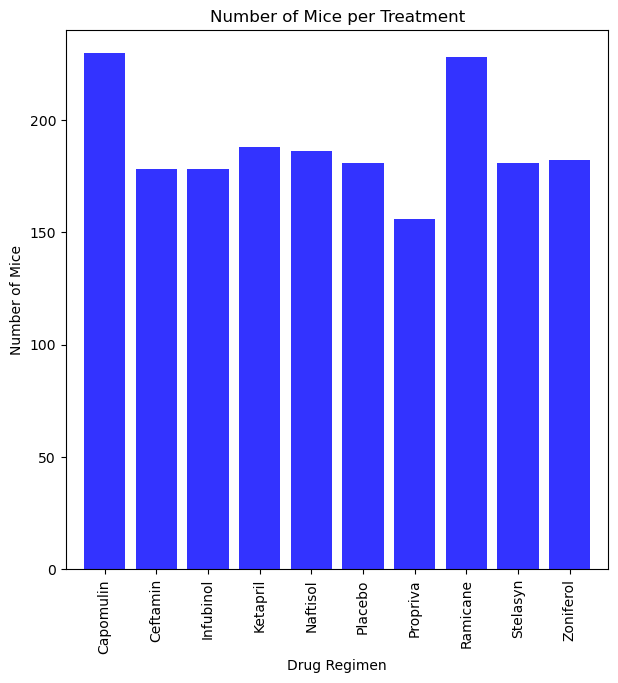

In [14]:
x_axis = np.arange(len(mice_timepoints))
fig1, ax1 = plt.subplots(figsize=(7, 7))
plt.bar(x_axis, mice_too, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_too)+10)

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = clean_df.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(gender.size())

In [16]:
mice_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]
mice_gender["Percentage of Sex"] = (100*(mice_gender["Total Count"]/mice_gender["Total Count"].sum()))
mice_gender["Percentage of Sex"] = mice_gender["Percentage of Sex"]
mice_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


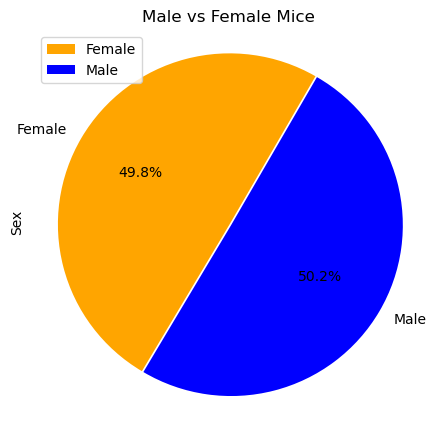

In [17]:
colors = ['orange', 'blue']
explode = (0.01, 0)
plot = mice_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=60, explode = explode, shadow = False, autopct="%1.1f%%")
plt.title('Male vs Female Mice')
plt.ylabel('Sex')
plt.axis("equal")
plt.show()

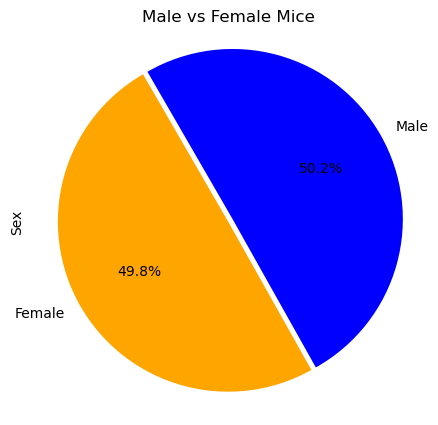

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['orange', 'blue']
explode = (0.03, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(5, 5))
# pie_chart = clean_df.sex.value_counts()
# plt.pie(counts.values,labels=counts.index.values)
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=120,)
plt.title('Male vs Female Mice')
plt.ylabel('Sex')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

In [20]:
# Start by getting the last (greatest) timepoint for each mouse
max_tp = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

max_tumor_volumes_df = pd.merge(max_tp, clean_df, on=(["Mouse ID","Timepoint"]))
max_tumor_volumes_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

In [57]:
# Locate the rows which contain mice on each drug and get the tumor volumes
    
for treatment in treatments:
    treatment_regimen = max_tumor_volumes_df.loc[max_tumor_volumes_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    treatment_regimen = max_tumor_volumes_df.loc[max_tumor_volumes_df["Drug Regimen"] == treatment]
    #tumor_volume= treatment_regimen['Tumor Volume (mm3)']
    
    
# add subset 

    final_vol_df = treatment_regimen.loc[treatment_regimen['Timepoint'] == treatment_regimen['Timepoint']]

    treatment_val = final_vol_df['Tumor Volume (mm3)']
    tumor_vol_data.append(treatment_regimen)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = treatment_val.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {treatment}: {iqr}')

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')

    outliers = (treatment_val.loc[(final_vol_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_vol_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {treatment} outliers: {outliers}')


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


In [55]:
tumor_vol_data

[    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
 19      b128         45    Capomulin  Female           9          22   
 24      b742         45    Capomulin    Male           7          21   
 61      f966         20    Capomulin    Male          16          17   
 64      g288         45    Capomulin    Male           3          19   
 66      g316         45    Capomulin  Female          22          22   
 81      i557         45    Capomulin  Female           1          24   
 84      i738         45    Capomulin  Female          23          20   
 86      j119         45    Capomulin  Female           7          23   
 88      j246         35    Capomulin  Female          21          21   
 109     l509         45    Capomulin    Male          17          21   
 116     l897         45    Capomulin    Male          17          19   
 122     m601         45    Capomulin    Male          22          17   
 125     m957         45    Capomulin  Female      

In [58]:
# # Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# # fig1, ax1 = plt.subplots()
# # #ax1.set_title('Tumor Volume in Mice')
# # ax1.set_ylabel('Final Tumor Volume (mm3)')
# # #ax1.set_xlabel('Drug Regimen')
# # ax1.boxplot(tumor_vol_data, labels=treatments)
# # plt.show()

# plt.boxplot(tumor_vol_data, labels=treatments)
# plt.show()


#Will be missing Box Plot. 

## Line and Scatter Plots

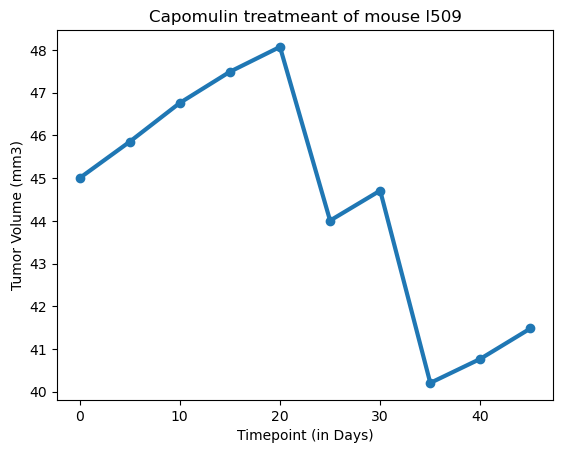

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_line = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
linegraph_df = cap_line.loc[cap_line["Mouse ID"] == "l509",:]

# x = linegraph_df["Timepoint"]
# y = linegraph_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(linegraph_df["Timepoint"], linegraph_df["Tumor Volume (mm3)"],linewidth=3, marker='o')
plt.xlabel('Timepoint (in Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('line')
plt.show()

# Trying to keep graphs separate

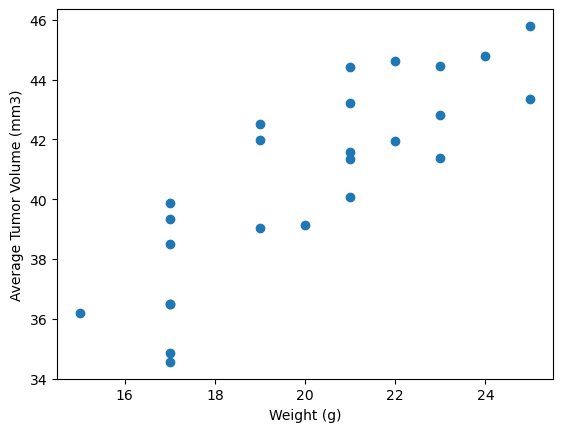

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = mouse_results.loc[mouse_results['Drug Regimen'] == 'Capomulin']
avg_mouse = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(avg_mouse['Weight (g)'],avg_mouse['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('Scatter')
plt.show()

## Correlation and Regression

The correlation between the mices' weight and the average tumor volume is 0.84
The r-squared is: 0.7088568047708723


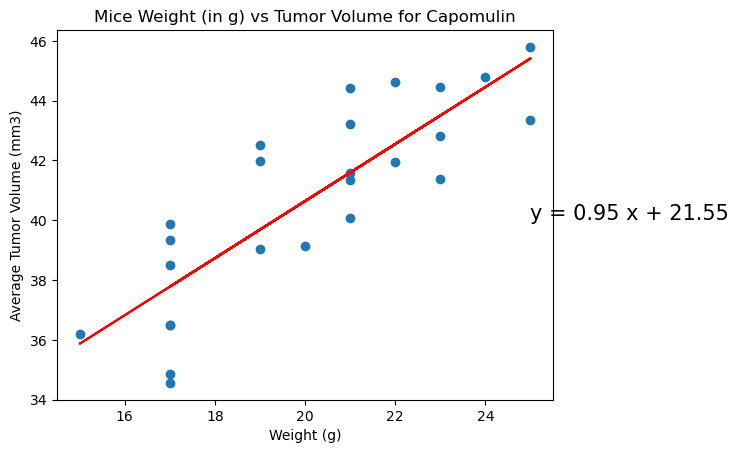

In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_mouse['Weight (g)'],avg_mouse['Tumor Volume (mm3)'])
print(f"The correlation between the mices' weight and the average tumor volume is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(avg_mouse["Weight (g)"],avg_mouse["Tumor Volume (mm3)"])
regress_values= avg_mouse["Weight (g)"]* slope + intercept

plt.scatter(avg_mouse["Weight (g)"],avg_mouse["Tumor Volume (mm3)"])
plt.plot(avg_mouse["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mice Weight (in g) vs Tumor Volume for Capomulin")
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.annotate(line_eq,(25,40), fontsize=15)
plt.show()